# Определение перспективного тарифа для телеком компании

## 1. Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
data_internet = pd.read_csv('/datasets/internet.csv')

In [4]:
data_messages = pd.read_csv('/datasets/messages.csv')

In [5]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [6]:
data_users = pd.read_csv('/datasets/users.csv')

In [7]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [8]:
data_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [9]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
data_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [12]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [13]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Вывод

Обьединять табилцы пока смысла не вижу, около 30% данных не существенны для проекта! Надо обратить на это внимание при работе с пропусками и ошибками. 

В массиве data_calls столбец call_date имеет не верный формат.

В массиве data_internet столбец session_date имеет не верный формат.

В массиве data_messages столбец message_date имеет не верный формат.

В массиве data_users столбец churn_date, reg_date имеет не верный формат.

Есть некоторые сомнения, относительно того, что ID и USER_ID имеюн не соответствующие друг другу форматы, с другой стороны данные столбцы не придется сравнивать между собой, а "правильного" формата тут нет

## 2. Подготовим данные

### 2.1 Приведем данные к нужным типам

In [17]:
import datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [18]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [19]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [20]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')


### 2.2 Найдем и исправим ошибки в данных

In [21]:
data_calls.duplicated().sum()

0

In [22]:
data_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [23]:
data_calls.query('duration == 0.00').count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

Нулевые значения занимают более 19% от массива данных, их нельзя удалять! Оставляем как есть, но имеем в виду что нулевые значения - это пропущенный звонок.

In [24]:
data_internet.duplicated().sum()

0

In [25]:
data_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [26]:
data_internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Нули в количестве трафика - это отсутствие передачи трафика у абонента в данный день! Например абонент може быть за границей, или просто в режиме digital detox

In [27]:
data_messages.duplicated().sum()

0

In [28]:
data_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [29]:
data_users.duplicated().sum()


0

In [30]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Фактически во всем фреме отсутствуют данные о прекращении пользования тарифом. Это не ошибка, большая часть пользователей до сих пор им пользуются. Пропуски не оказывают никакого влияния на работу с массивом, оставляем как есть.

#### Вывод

В массивах практически отсутствуют ошибки и пропуски. Опсения вызывают только нули в кол-ве трафика.

### 2.3 Найдем количество сделанных звонков и израсходованных минут разговора по месяцам

In [31]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

In [32]:
data_calls['month'].value_counts().sort_values()

1      1476
2      3328
3      6687
4      9272
5     12647
6     14716
7     18298
8     21488
9     24061
10    27146
11    29501
12    33987
Name: month, dtype: int64

In [33]:
data_calls.pivot_table(index='month', values='duration', aggfunc='sum').sort_values(by='duration')

,duration
month,
1,10206.44
2,23145.58
3,45433.85
4,62530.92
5,83770.77
6,99249.71
7,124373.23
8,145071.63
9,163723.16


### 2.4 Найдем количество отправленных сообщений по месяцам

In [34]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

In [35]:
data_messages['month'].value_counts().sort_values()

1       924
2      1924
3      3648
4      5179
5      7298
6      8983
7     11320
8     13088
9     14759
10    17114
11    18244
12    20555
Name: month, dtype: int64

### 2.5 Найдем объем израсходованного интернет-трафика по месяцам

In [36]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [37]:
data_internet.pivot_table(index='month', values='mb_used', aggfunc='sum').sort_values(by='mb_used')



,mb_used
month,
1,407732.53
2,955251.65
3,1811835.61
4,2433311.62
5,3525862.24
6,4180017.17
7,5029478.75
8,5998157.07
9,6447422.36


### 2.6 Найдем помесячную выручку с каждого пользователя

In [38]:
data_messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [39]:
data_calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,0.00,1000,11
6,1000_6,2018-10-18,0.00,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,0.00,1000,8


In [40]:
import math 

data_calls['duration'] = data_calls['duration'].apply(math.ceil)


In [41]:
data_calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


In [42]:
data_calls_next = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')

In [43]:
data_messages_next = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')

In [44]:
data_internet_next = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')

In [45]:
data_calls_next.head(10)

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
        10          350
        11          338
        12          333
1001    11          430
        12          414

In [46]:
data_next1 = data_messages_next.merge(data_calls_next, on=['user_id','month'], how='left')

In [47]:
data_next1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
id          2717 non-null int64
duration    2678 non-null float64
dtypes: float64(1), int64(1)
memory usage: 53.9 KB


In [48]:
data_next1.head(10)

id  duration
user_id month              
1000    5      22     159.0
        6      60     172.0
        7      75     340.0
        8      81     408.0
        9      57     466.0
        10     73     350.0
        11     58     338.0
        12     70     333.0
1002    6       4     117.0
        7      11     214.0

In [49]:
data_next_lol = data_messages_next.merge(data_calls_next, on=['user_id','month'], how='outer')

In [50]:
data_next_lol.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3213 entries, (1000, 5) to (1494, 12)
Data columns (total 2 columns):
id          2717 non-null float64
duration    3174 non-null float64
dtypes: float64(2)
memory usage: 63.7 KB


In [51]:
data_next2 = data_next1.merge(data_internet_next, on=['user_id','month'], how='outer')
data_next2.rename(columns={'id': 'sms', 'duration': 'call_min'}, inplace=True)

In [52]:
data_next2.head(10)


sms  call_min   mb_used
user_id month                          
1000    5      22.0     159.0   2253.49
        6      60.0     172.0  23233.77
        7      75.0     340.0  14003.64
        8      81.0     408.0  14055.93
        9      57.0     466.0  14568.91
        10     73.0     350.0  14702.49
        11     58.0     338.0  14756.47
        12     70.0     333.0   9817.61
1002    6       4.0     117.0  10856.82
        7      11.0     214.0  17580.10

In [53]:
data_next3 = data_users.pivot_table(index=['user_id', 'tariff','city'])
data_next3 = data_next3.reset_index(level=['city'])

In [54]:
data_next3.head(10)

,,city,age
user_id,tariff,,
1000,ultra,Краснодар,52
1001,smart,Москва,41
1002,smart,Стерлитамак,59
1003,ultra,Москва,23
1004,ultra,Новокузнецк,68
1005,smart,Набережные Челны,67
1006,smart,Ульяновск,21
1007,smart,Москва,65
1008,smart,Челябинск,63


In [55]:
data_next4 = data_next2.join(data_next3)
data_next4 = data_next4.reset_index(level=['tariff'])

In [56]:
data_next4.head(10)

tariff   sms  call_min   mb_used       city  age
user_id month                                                 
1000    5      ultra  22.0     159.0   2253.49  Краснодар   52
        6      ultra  60.0     172.0  23233.77  Краснодар   52
        7      ultra  75.0     340.0  14003.64  Краснодар   52
        8      ultra  81.0     408.0  14055.93  Краснодар   52
        9      ultra  57.0     466.0  14568.91  Краснодар   52
        10     ultra  73.0     350.0  14702.49  Краснодар   52
        11     ultra  58.0     338.0  14756.47  Краснодар   52
        12     ultra  70.0     333.0   9817.61  Краснодар   52
1001    11     smart   NaN       NaN  18429.34     Москва   41
        12     smart   NaN       NaN  14036.66     Москва   41

In [57]:
data_next4.isna().sum()

tariff        0
sms         497
call_min    536
mb_used      11
city          0
age           0
dtype: int64

In [58]:
data_next4 = data_next4.fillna(0)

In [59]:
data_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [60]:
def found_fee(tariff):
    if tariff == 'ultra':
        return 1950
    if tariff == 'smart':
        return 550

In [61]:
data_next4['fee'] = data_next4['tariff'].apply(found_fee)

In [62]:
data_next4.head(10)

tariff   sms  call_min   mb_used       city  age   fee
user_id month                                                       
1000    5      ultra  22.0     159.0   2253.49  Краснодар   52  1950
        6      ultra  60.0     172.0  23233.77  Краснодар   52  1950
        7      ultra  75.0     340.0  14003.64  Краснодар   52  1950
        8      ultra  81.0     408.0  14055.93  Краснодар   52  1950
        9      ultra  57.0     466.0  14568.91  Краснодар   52  1950
        10     ultra  73.0     350.0  14702.49  Краснодар   52  1950
        11     ultra  58.0     338.0  14756.47  Краснодар   52  1950
        12     ultra  70.0     333.0   9817.61  Краснодар   52  1950
1001    11     smart   0.0       0.0  18429.34     Москва   41   550
        12     smart   0.0       0.0  14036.66     Москва   41   550

In [63]:
def found_sms(row):
    if row['tariff'] == 'ultra':
        if row['sms'] > 1000:
            sms_fee_money = row['fee'] + (row['sms'] - 1000)*1
        if row['sms'] <= 1000:
            sms_fee_money = row['fee']
    if row['tariff'] == 'smart':
        if row['sms'] > 50:
            sms_fee_money = row['fee'] + (row['sms'] - 50)*3
        if row['sms'] <= 50:
            sms_fee_money = row['fee']
    return sms_fee_money

In [64]:
data_next4['sms_fee_money'] = data_next4.apply(found_sms, axis=1)

In [65]:
data_next4.head(10)

tariff   sms  call_min   mb_used       city  age   fee  \
user_id month                                                          
1000    5      ultra  22.0     159.0   2253.49  Краснодар   52  1950   
        6      ultra  60.0     172.0  23233.77  Краснодар   52  1950   
        7      ultra  75.0     340.0  14003.64  Краснодар   52  1950   
        8      ultra  81.0     408.0  14055.93  Краснодар   52  1950   
        9      ultra  57.0     466.0  14568.91  Краснодар   52  1950   
        10     ultra  73.0     350.0  14702.49  Краснодар   52  1950   
        11     ultra  58.0     338.0  14756.47  Краснодар   52  1950   
        12     ultra  70.0     333.0   9817.61  Краснодар   52  1950   
1001    11     smart   0.0       0.0  18429.34     Москва   41   550   
        12     smart   0.0       0.0  14036.66     Москва   41   550   

               sms_fee_money  
user_id month                 
1000    5             1950.0  
        6             1950.0  
        7             1950.0  
        8             1950.0  
        9             1950.0  
        10            1950.0  
        11            1950.0  
        12            1950.0  
1001    11             550.0  
        12             550.0

In [66]:
data_next4['sms_fee_money'].value_counts()

550.0     1665
1950.0     985
553.0       24
568.0       20
598.0       20
          ... 
775.0        1
772.0        1
808.0        1
781.0        1
829.0        1
Name: sms_fee_money, Length: 75, dtype: int64

In [67]:
def found_min(row):
    if row['tariff'] == 'ultra':
        if row['call_min'] > 3000:
            s_f_m_money = row['sms_fee_money'] + (row['call_min'] - 3000)*1
        if row['call_min'] <= 3000:
            s_f_m_money = row['sms_fee_money']
    if row['tariff'] == 'smart':
        if row['call_min'] > 500:
            s_f_m_money = row['sms_fee_money'] + (row['call_min'] - 500)*3
        if row['call_min'] <= 500:
            s_f_m_money = row['sms_fee_money']
    return s_f_m_money

In [68]:
data_next4['s_f_m_money'] = data_next4.apply(found_sms, axis=1)

In [69]:
data_next4.head(10)

tariff   sms  call_min   mb_used       city  age   fee  \
user_id month                                                          
1000    5      ultra  22.0     159.0   2253.49  Краснодар   52  1950   
        6      ultra  60.0     172.0  23233.77  Краснодар   52  1950   
        7      ultra  75.0     340.0  14003.64  Краснодар   52  1950   
        8      ultra  81.0     408.0  14055.93  Краснодар   52  1950   
        9      ultra  57.0     466.0  14568.91  Краснодар   52  1950   
        10     ultra  73.0     350.0  14702.49  Краснодар   52  1950   
        11     ultra  58.0     338.0  14756.47  Краснодар   52  1950   
        12     ultra  70.0     333.0   9817.61  Краснодар   52  1950   
1001    11     smart   0.0       0.0  18429.34     Москва   41   550   
        12     smart   0.0       0.0  14036.66     Москва   41   550   

               sms_fee_money  s_f_m_money  
user_id month                              
1000    5             1950.0       1950.0  
        6             1950.0       1950.0  
        7             1950.0       1950.0  
        8             1950.0       1950.0  
        9             1950.0       1950.0  
        10            1950.0       1950.0  
        11            1950.0       1950.0  
        12            1950.0       1950.0  
1001    11             550.0        550.0  
        12             550.0        550.0

In [70]:
data_next4['gb_used'] = data_next4['mb_used'] / 1024

In [71]:
data_next4.head(10)

tariff   sms  call_min   mb_used       city  age   fee  \
user_id month                                                          
1000    5      ultra  22.0     159.0   2253.49  Краснодар   52  1950   
        6      ultra  60.0     172.0  23233.77  Краснодар   52  1950   
        7      ultra  75.0     340.0  14003.64  Краснодар   52  1950   
        8      ultra  81.0     408.0  14055.93  Краснодар   52  1950   
        9      ultra  57.0     466.0  14568.91  Краснодар   52  1950   
        10     ultra  73.0     350.0  14702.49  Краснодар   52  1950   
        11     ultra  58.0     338.0  14756.47  Краснодар   52  1950   
        12     ultra  70.0     333.0   9817.61  Краснодар   52  1950   
1001    11     smart   0.0       0.0  18429.34     Москва   41   550   
        12     smart   0.0       0.0  14036.66     Москва   41   550   

               sms_fee_money  s_f_m_money    gb_used  
user_id month                                         
1000    5             1950.0       1950.0   2.200674  
        6             1950.0       1950.0  22.689229  
        7             1950.0       1950.0  13.675430  
        8             1950.0       1950.0  13.726494  
        9             1950.0       1950.0  14.227451  
        10            1950.0       1950.0  14.357900  
        11            1950.0       1950.0  14.410615  
        12            1950.0       1950.0   9.587510  
1001    11             550.0        550.0  17.997402  
        12             550.0        550.0  13.707676

In [72]:
data_next4['gb_used'] = data_next4['gb_used'].apply(math.ceil)

In [73]:
def found_gb(row):
    if row['tariff'] == 'ultra':
        if row['gb_used'] > 30.72:
            money = row['s_f_m_money'] + (row['gb_used'] - 30.72) * 150
        if row['gb_used'] < 30.72:  
            money = row['s_f_m_money']
    if row['tariff'] == 'smart':
        if row['gb_used'] > 15.36:
            money = row['s_f_m_money'] + (row['gb_used'] - 15.36) * 200 
        if row['gb_used'] < 15.36:  
            money = row['s_f_m_money']
    return money


In [74]:
data_next4['money'] = data_next4.apply(found_gb, axis=1)

In [75]:
data_next4.head(10)

tariff   sms  call_min   mb_used       city  age   fee  \
user_id month                                                          
1000    5      ultra  22.0     159.0   2253.49  Краснодар   52  1950   
        6      ultra  60.0     172.0  23233.77  Краснодар   52  1950   
        7      ultra  75.0     340.0  14003.64  Краснодар   52  1950   
        8      ultra  81.0     408.0  14055.93  Краснодар   52  1950   
        9      ultra  57.0     466.0  14568.91  Краснодар   52  1950   
        10     ultra  73.0     350.0  14702.49  Краснодар   52  1950   
        11     ultra  58.0     338.0  14756.47  Краснодар   52  1950   
        12     ultra  70.0     333.0   9817.61  Краснодар   52  1950   
1001    11     smart   0.0       0.0  18429.34     Москва   41   550   
        12     smart   0.0       0.0  14036.66     Москва   41   550   

               sms_fee_money  s_f_m_money  gb_used   money  
user_id month                                               
1000    5             1950.0       1950.0        3  1950.0  
        6             1950.0       1950.0       23  1950.0  
        7             1950.0       1950.0       14  1950.0  
        8             1950.0       1950.0       14  1950.0  
        9             1950.0       1950.0       15  1950.0  
        10            1950.0       1950.0       15  1950.0  
        11            1950.0       1950.0       15  1950.0  
        12            1950.0       1950.0       10  1950.0  
1001    11             550.0        550.0       18  1078.0  
        12             550.0        550.0       14   550.0

## 3. Проанализируем данные

### 3.1 Минуты разговора

In [76]:
data_next_ultra = data_next4.query('tariff == "ultra"')
min_ultra_mean = data_next_ultra['call_min'].mean()
print(min_ultra_mean) #Среднее кол-во минут, выговариваемых на тарифе ультра

427.38578680203045


In [77]:
data_next_smart = data_next4.query('tariff == "smart"')
min_smart_mean = data_next_smart['call_min'].mean()
print(min_smart_mean) #Среднее кол-во минут, выговариваемых на тарифе смарт

361.7460744728578


In [78]:
import numpy as np



min_var_ultra = np.var(data_next_ultra['call_min'])
print(min_var_ultra) #Дисперсия минут на тарифе ультра

128794.3831482388


In [79]:
min_var_smart = np.var(data_next_smart['call_min'])
print(min_var_smart) #Дисперсия минут на тарифе smart

51695.77670621428


In [80]:
min_std_ultra = np.std(data_next_ultra['call_min'])
print(min_std_ultra) #Среднее отклонение минут на тарифе ультра

358.87934344043657


In [81]:
min_std_smart = np.std(data_next_smart['call_min'])
print(min_std_smart) #Среднее отклонение минут на тарифе smart

227.3670528159572


График минут разгвора в месяц на тарифе "ультра"
Ось "х" - кол-во минут разговра в месяц
Ось "у" - кол-во клиентов


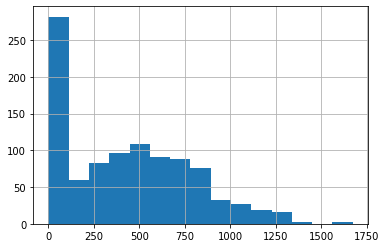

In [82]:
data_next_ultra['call_min'].hist(bins=15)
print('График минут разгвора в месяц на тарифе "ультра"')
print('Ось "х" - кол-во минут разговра в месяц')
print('Ось "у" - кол-во клиентов')

График минут разгвора в месяц на тарифе "смарт"
Ось "х" - кол-во минут разговра в месяц
Ось "у" - кол-во клиентов


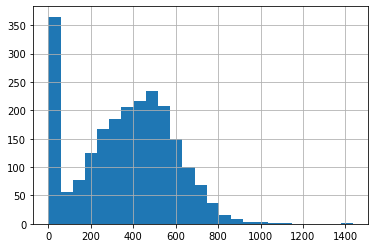

In [83]:
data_next_smart['call_min'].hist(bins=25)
print('График минут разгвора в месяц на тарифе "смарт"')
print('Ось "х" - кол-во минут разговра в месяц')
print('Ось "у" - кол-во клиентов')

#### Вывод

На тарифе смарт видим нормальное распределение, с еденичными выбросами в районе 1400 мин...видимо этим клиентам нужно поменять свой тариф.
На тарифе ультра распределение более равномерное, среднее смещено вправо, тариф для тех кто говорит по телефону больше, так что все логично!

### 3.2 Кол-во сообщений

In [84]:
sms_ultra_mean = data_next_ultra['sms'].mean()
print(sms_ultra_mean) #Среднее кол-во смс, отправляемых на тарифе ультра

49.36345177664975


In [85]:
sms_smart_mean = data_next_smart['sms'].mean()
print(sms_smart_mean) #Среднее кол-во смс, отправляемых на тарифе смарт

33.384028712427096


In [86]:

sms_var_ultra = np.var(data_next_ultra['sms'])
print(sms_var_ultra) #Дисперсия смс на тарифе ультра


2282.9460753948824


In [87]:
sms_var_smart = np.var(data_next_smart['sms'])
print(sms_var_smart) #Дисперсия смс на тарифе smart

796.455482917076


In [88]:
sms_std_ultra = np.std(data_next_ultra['sms'])
print(sms_std_ultra) #Среднее отклонение смс на тарифе ультра

47.78018496610161


In [89]:
sms_std_smart = np.std(data_next_smart['sms'])
print(sms_std_smart) #Среднее отклонение смс на тарифе smart

28.221542886898938


График отправленных смс в месяц на тарифе "ультра"
Ось "х" - кол-во смс  в месяц
Ось "у" - кол-во клиентов


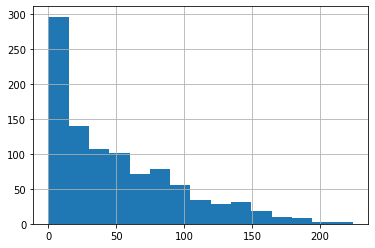

In [90]:
data_next_ultra['sms'].hist(bins=15)

print('График отправленных смс в месяц на тарифе "ультра"')
print('Ось "х" - кол-во смс  в месяц')
print('Ось "у" - кол-во клиентов')

График отправленных смс в месяц на тарифе "смарт"
Ось "х" - кол-во смс  в месяц
Ось "у" - кол-во клиентов


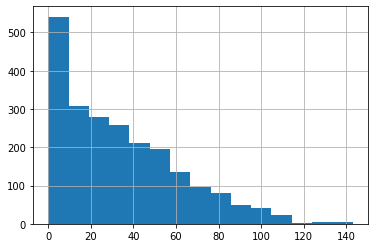

In [91]:
data_next_smart['sms'].hist(bins=15)
print('График отправленных смс в месяц на тарифе "смарт"')
print('Ось "х" - кол-во смс  в месяц')
print('Ось "у" - кол-во клиентов')

#### Вывод

В обоих гарфиках датасет скошен вправо, смс сейчас не очень популярны, большинство пользуются мессенджерами. Так же отмечу что на тарифе смарт, более равномерная структура графика, больше кол-во клиентов.

### 3.3 Обьем трафика

In [92]:
mb_ultra_mean = data_next_ultra['mb_used'].mean()
print(mb_ultra_mean) #Среднее кол-во мегабайт, скачиваемых на тарифе ультра

19468.80520812183


In [93]:
mb_smart_mean = data_next_smart['mb_used'].mean()
print(mb_smart_mean) #Среднее кол-во мегабайс, скачиваемых на тарифе смарт

16208.386989681472


In [94]:
mb_var_ultra = np.var(data_next_ultra['mb_used'])
print(mb_var_ultra) #Дисперсия траффика на тарифе ультра

101647713.2617464


In [95]:
mb_var_smart = np.var(data_next_smart['mb_used'])
print(mb_var_smart) #Дисперсия траффика на тарифе smart

34447035.49528493


In [96]:
mb_std_ultra = np.std(data_next_ultra['mb_used'])
print(mb_std_ultra) #Среднее отклонение траффика на тарифе ультра

10082.049060669484


In [97]:
mb_std_smart = np.std(data_next_smart['mb_used'])
print(mb_std_smart) #Среднее отклонение траффика на тарифе smart

5869.159692433401


График израсходованного трафика в месяц на тарифе "ультра"
Ось "х" - кол-во мб трафика
Ось "у" - кол-во клиентов


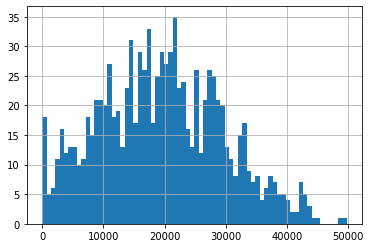

In [98]:
data_next_ultra['mb_used'].hist(bins=70)
print('График израсходованного трафика в месяц на тарифе "ультра"')
print('Ось "х" - кол-во мб трафика')
print('Ось "у" - кол-во клиентов')

График израсходованного трафика в месяц на тарифе "смарт"
Ось "х" - кол-во мб трафика
Ось "у" - кол-во клиентов


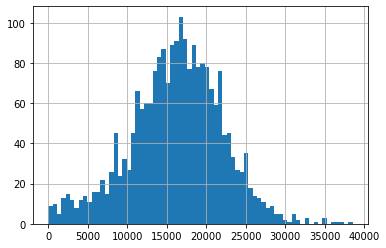

In [99]:
data_next_smart['mb_used'].hist(bins=70)
print('График израсходованного трафика в месяц на тарифе "смарт"')
print('Ось "х" - кол-во мб трафика')
print('Ось "у" - кол-во клиентов')

#### Вывод

Оба графика имеют нормальное распределение. Тариф смарт самое клаасическое, без больших выбросов, как в учебнике. Тариф Ультра менее расновмерный, вероятно это говорит о том, что некоторое количество пользователей тарифа(более обеспеченных людей) не так активно пользуются мобильным интеренетом.

## 4. Проверка гипотезы

### 4.1 средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [100]:
from scipy import stats as st


data_next_mos = data_next4.query('city == "Москва"')
data_money_mos = data_next_mos['money']

data_next_nomos = data_next4.query('city != "Москва"')
data_money_nomos = data_next_nomos['money']


alpha = 0.05


In [101]:
print(data_money_mos.mean())
print(data_money_nomos.mean())

1439.71031096563
1401.5409143296197


In [102]:
results_mos = st.ttest_ind(data_money_mos, data_money_nomos)


print('p-значение:', results_mos.pvalue)

if results_mos.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.26413825499929405
Не получилось отвергнуть нулевую гипотезу


#### Вывод

По ощущениям затраты на связь в Москве слабо отличаются от других городов.
Нулевая гипотеза - среднее двух совокупносей (затраты на связь в месяц в МСК и затраты на связь в месяц) равны.  Альтернативная гипотеза - затраты отличаются. Критический уровень статистической значимости обозначим как 0,05. Средняя выручка с пользователей в Москве и в остальных городах отличается не значительно.

### 4.2 средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [103]:

data_smart_money = data_next_smart['money']
data_ultima_money = data_next_ultra['money']

alpha = 0.05

In [104]:
print(data_smart_money.mean())
print(data_ultima_money.mean())

1123.0354419021983
2055.4598984771574


In [105]:
results = st.ttest_ind(data_smart_money, data_ultima_money)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.064955712067962e-271
Отвергаем нулевую гипотезу


#### Вывод

Тариф смарт более дешевый! Логично что затраты пользователей этого тарифа будут меньше, чем ультра.
Нулевая гипотеза - среднее двух совокупносей (затраты на связь в месяц пользователей тарифа смарт и и тарифа ультра соответственно) равны . Альтернативная гипотеза - затраты не связь на тарифах отличается. Средняя выручка с пользователей на данных тарифах занчительно отлчиается.

## 5. Общий вывод

Структура потребления пользователей разных тарифово схожа! Однако на более дорогом тарифе, затрат и потребления соответственно больше. Все логично.